# Project Title
### Data Engineering Capstone Project

#### Project Summary
--describe your project at a high level--

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import configparser

from pyspark.sql import SparkSession

import utility

import importlib
importlib.reload(utility)
from utility import visualise_missing_values, clean_immigration, clean_temperature_data
from utility import clean_demographics_data

In [2]:
config = configparser.ConfigParser()
config.read('config.cfg')

os.environ['AWS_ACCESS_KEY_ID']=config['AWS']['AWS_ACCESS_KEY_ID']
os.environ['AWS_SECRET_ACCESS_KEY']=config['AWS']['AWS_SECRET_ACCESS_KEY']

### Step 1: Scope the Project and Gather Data

#### Scope 
<hr></hr>

<p>
The objective of this project is to develop a cloud-based data warehouse solution that will provide decision and policy makers with an analytics database for immigration and toursim related data. A use case of this analytics database is to power dashboards and visualizations that assist organisations such as the National Travel & Tourism Office (NTTO) in it's quest to create a positive climate for growth in travel and tourism through reducing institutional barriers to tourism.
</p>

<p>
The technology used in this project is <b>Amazon S3, Amazon Redshift, Apache Spark and Apache Airflow</b>. Data will be read and staged from the customers repository to S3 using Spark. Scheduled monthly jobs will be run using Apache Airflow to populate a data warehouse on RedShift. 
</p>

#### Data Description 
<hr></hr>

Describe the data sets you're using. Where did it come from? What type of information is included? 


##### World Temperature Data
- This dataset came from Kaggle.

##### U.S. City Demographic Data 
- This data comes from OpenSoft.

##### Airport Code Table
- This is a simple table of airport codes and corresponding cities. 

#### Technology

#### Architecture

#### I94 Immigration Data: Data Description 
---

This data comes from the US National Tourism and Trade Office. In the past all foreign visitors to the U.S. arriving via air or sea were required to complete paper Customs and Border Protection Form I-94 Arrival/Departure Record or Form I-94W Nonimmigrant Visa Waiver Arrival/Departure Record and this dataset comes from this forms. 

This dataset forms the core of the data warehouse and the customer repository has a years worth of data for the year 2016 and the dataset is divided by month. For this project the data is in a folder located at ../../data/18-83510-I94-Data-2016/. Each months data is stored in an SAS binary database storage format <i>sas7bdat</i>. For this project we have chosen going to work with data for the month of April. However, the data extraction, transformation and loading utility functions have been designed to work with any month's worth of data.

<b><i>Data dictionary</i></b>

<table class="tg" align="left">
  <tr>
    <th class="tg-0pky">Feature</th>
    <th class="tg-0pky">Description</th>
  </tr>
 <tr><td class="tg-0pky">cicid</td><td class="tg-0pky">Unique record ID</td>
 <tr><td class="tg-0pky">i94yr</td><td class="tg-0pky">4 digit year</td>
 <tr><td class="tg-0pky">i94mon</td><td class="tg-0pky">Numeric month</td>
 <tr><td class="tg-0pky">i94cit</td><td class="tg-0pky">3 digit code for immigrant country of birth</td>
 <tr><td class="tg-0pky">i94res</td><td class="tg-0pky">3 digit code for immigrant country of residence </td>
 <tr><td class="tg-0pky">i94port</td><td class="tg-0pky">Port of admission</td>
 <tr><td class="tg-0pky">arrdate</td><td class="tg-0pky">Arrival Date in the USA</td>
 <tr><td class="tg-0pky">i94mode</td><td class="tg-0pky">Mode of transportation (1 = Air; 2 = Sea; 3 = Land; 9 = Not reported)</td>
 <tr><td class="tg-0pky">i94addr</td><td class="tg-0pky">USA State of arrival</td>
 <tr><td class="tg-0pky">depdate</td><td class="tg-0pky">Departure Date from the USA</td>
 <tr><td class="tg-0pky">i94bir</td><td class="tg-0pky">Age of Respondent in Years</td>
 <tr><td class="tg-0pky">i94visa</td><td class="tg-0pky">Visa codes collapsed into three categories</td>
 <tr><td class="tg-0pky">count</td><td class="tg-0pky">Field used for summary statistics</td>
 <tr><td class="tg-0pky">dtadfile</td><td class="tg-0pky">Character Date Field - Date added to I-94 Files</td>
 <tr><td class="tg-0pky">visapost</td><td class="tg-0pky">Department of State where where Visa was issued </td>
 <tr><td class="tg-0pky">occup</td><td class="tg-0pky">Occupation that will be performed in U.S</td>
 <tr><td class="tg-0pky">entdepa</td><td class="tg-0pky">Arrival Flag - admitted or paroled into the U.S.</td>
 <tr><td class="tg-0pky">entdepd</td><td class="tg-0pky">Departure Flag - Departed, lost I-94 or is deceased</td>
 <tr><td class="tg-0pky">entdepu</td><td class="tg-0pky">Update Flag - Either apprehended, overstayed, adjusted to perm residence</td>
 <tr><td class="tg-0pky">matflag</td><td class="tg-0pky">Match flag - Match of arrival and departure records</td>
 <tr><td class="tg-0pky">biryear</td><td class="tg-0pky">4 digit year of birth</td>
 <tr><td class="tg-0pky">dtaddto</td><td class="tg-0pky">Character Date Field - Date to which admitted to U.S. (allowed to stay until)</td>
 <tr><td class="tg-0pky">gender</td><td class="tg-0pky">Non-immigrant sex</td>
 <tr><td class="tg-0pky">insnum</td><td class="tg-0pky">INS number</td>
 <tr><td class="tg-0pky">airline</td><td class="tg-0pky">Airline used to arrive in U.S.</td>
 <tr><td class="tg-0pky">admnum</td><td class="tg-0pky">Admission Number</td>
 <tr><td class="tg-0pky">fltno</td><td class="tg-0pky">Flight number of Airline used to arrive in U.S.</td>
 <tr><td class="tg-0pky">visatype</td><td class="tg-0pky">Class of admission legally admitting the non-immigrant to temporarily stay in U.S.</td>
</table>

##### Load I94 Immigration dataset

In [3]:
# Read in the data here
fname = '../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat'
df = pd.read_sas(fname, 'sas7bdat', encoding="ISO-8859-1")

In [4]:
df.head()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,6.0,2016.0,4.0,692.0,692.0,XXX,20573.0,NaN,NaN,NaN,...,U,NaN,1979.0,10282016,NaN,NaN,NaN,1.897628e+09,NaN,B2
1,7.0,2016.0,4.0,254.0,276.0,ATL,20551.0,1.0,AL,NaN,...,Y,NaN,1991.0,D/S,M,NaN,NaN,3.736796e+09,00296,F1
2,15.0,2016.0,4.0,101.0,101.0,WAS,20545.0,1.0,MI,20691.0,...,NaN,M,1961.0,09302016,M,NaN,OS,6.666432e+08,93,B2
3,16.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,NaN,M,1988.0,09302016,NaN,NaN,AA,9.246846e+10,00199,B2
4,17.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,NaN,M,2012.0,09302016,NaN,NaN,AA,9.246846e+10,00199,B2


In [5]:
spark = SparkSession.builder.\
config("spark.jars.packages","saurfang:spark-sas7bdat:2.0.0-s_2.11")\
.enableHiveSupport().getOrCreate()
df_spark =spark.read.format('com.github.saurfang.sas.spark').load('../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat')


In [6]:
df_spark.count()

3096313

In [ ]:
#write to parquet
df_spark.write.parquet("sas_data")
df_spark=spark.read.parquet("sas_data")

#### World Temperature Data: Data Description 
---

The World Temperature dataset comes from Kaggle and represents global land temperatures by city.

##### Load World Temperature data

In [7]:
file_name = '../../data2/GlobalLandTemperaturesByCity.csv'
df_wtd = pd.read_csv(file_name)

In [8]:
# Peek at the Data
df_wtd.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


<b><i>Data dictionary</i></b>

<table class="tg" align="left">
  <tr>
    <th class="tg-0pky">Feature</th>
    <th class="tg-0pky">Description</th>
  </tr>
 <tr><td class="tg-0pky">dt</td><td class="tg-0pky">Date</td>
 <tr><td class="tg-0pky">AverageTemperature</td><td class="tg-0pky">Global average land temperature in celsius</td>
 <tr><td class="tg-0pky">AverageTemperatureUncertainty</td><td class="tg-0pky">95% confidence interval around the average</td>
 <tr><td class="tg-0pky">City</td><td class="tg-0pky">Name of City</td>
 <tr><td class="tg-0pky">Country</td><td class="tg-0pky">Name of Country</td>
 <tr><td class="tg-0pky">Latitude</td><td class="tg-0pky">City Latitude</td>
 <tr><td class="tg-0pky">Longitude</td><td class="tg-0pky">City Longitude</td>
</table>

In [9]:
df_wtd.shape

(8599212, 7)

#### U.S. City Demographic Data: Data Description 
---

This data comes from OpenSoft and contains information about the demographics of all US cities and census-designated places with a population greater or equal to 65,000. Original data comes from the US Census Bureau's 2015 American Community Survey.

##### Load the dataset

In [10]:
file_name = "us-cities-demographics.csv"
df_cdd = pd.read_csv(file_name, sep=';')

In [11]:
df_cdd.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


<b><i>Data dictionary</i></b>

<table class="tg" align="left">
  <tr>
    <th class="tg-0pky">Feature</th>
    <th class="tg-0pky">Description</th>
  </tr>
 <tr><td class="tg-0pky">City</td><td class="tg-0pky">City Name</td>
 <tr><td class="tg-0pky">State</td><td class="tg-0pky">US State where city is located</td>
 <tr><td class="tg-0pky">Median Age</td><td class="tg-0pky">Median age of the population</td>
 <tr><td class="tg-0pky">Male Population</td><td class="tg-0pky">Count of male population</td>
 <tr><td class="tg-0pky">Female Population</td><td class="tg-0pky">Count of female population</td>
 <tr><td class="tg-0pky">Total Population</td><td class="tg-0pky">Count of total population</td>
 <tr><td class="tg-0pky">Number of Veterans</td><td class="tg-0pky">Count of total Veterans</td>
 <tr><td class="tg-0pky">Foreign born</td><td class="tg-0pky">Count of residents of the city that were not born in the city</td>
 <tr><td class="tg-0pky">Average Household Size</td><td class="tg-0pky">Average city household size</td>
 <tr><td class="tg-0pky">State Code</td><td class="tg-0pky">Code of the US state</td>
 <tr><td class="tg-0pky">Race</td><td class="tg-0pky">Respondent race</td>
 <tr><td class="tg-0pky">Count</td><td class="tg-0pky">Count of city's individual per race</td>
</table>

In [22]:
df_cdd.shape

(2891, 12)

### Step 2: Explore and Assess the Data
#### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.

#### Cleaning Steps
Document steps necessary to clean the data

#### EDA Immigration data

In [12]:
# list all files in the customer repository
files = os.listdir('../../data/18-83510-I94-Data-2016/')
files

['i94_apr16_sub.sas7bdat',
 'i94_sep16_sub.sas7bdat',
 'i94_nov16_sub.sas7bdat',
 'i94_mar16_sub.sas7bdat',
 'i94_jun16_sub.sas7bdat',
 'i94_aug16_sub.sas7bdat',
 'i94_may16_sub.sas7bdat',
 'i94_jan16_sub.sas7bdat',
 'i94_oct16_sub.sas7bdat',
 'i94_jul16_sub.sas7bdat',
 'i94_feb16_sub.sas7bdat',
 'i94_dec16_sub.sas7bdat']

In [9]:
# Read in the data for April 2016
fname = '../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat'
df = pd.read_sas(fname, 'sas7bdat', encoding="ISO-8859-1")

In [10]:
# lets see the dataframe dimensions
df.shape

(3096313, 28)

In [11]:
# get the first 5 rows of the dataframe
df.head()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,6.0,2016.0,4.0,692.0,692.0,XXX,20573.0,NaN,NaN,NaN,...,U,NaN,1979.0,10282016,NaN,NaN,NaN,1.897628e+09,NaN,B2
1,7.0,2016.0,4.0,254.0,276.0,ATL,20551.0,1.0,AL,NaN,...,Y,NaN,1991.0,D/S,M,NaN,NaN,3.736796e+09,00296,F1
2,15.0,2016.0,4.0,101.0,101.0,WAS,20545.0,1.0,MI,20691.0,...,NaN,M,1961.0,09302016,M,NaN,OS,6.666432e+08,93,B2
3,16.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,NaN,M,1988.0,09302016,NaN,NaN,AA,9.246846e+10,00199,B2
4,17.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,NaN,M,2012.0,09302016,NaN,NaN,AA,9.246846e+10,00199,B2


In [ ]:
# be careful with running this cell, will take a long time to execute
for name in files:
    # read the data into a data frame
    fname = '../../data/18-83510-I94-Data-2016/' + name
    df_f =  pd.read_sas(fname, 'sas7bdat', encoding="ISO-8859-1")
    print(f'{fname} df.shape = ', df_f.shape)

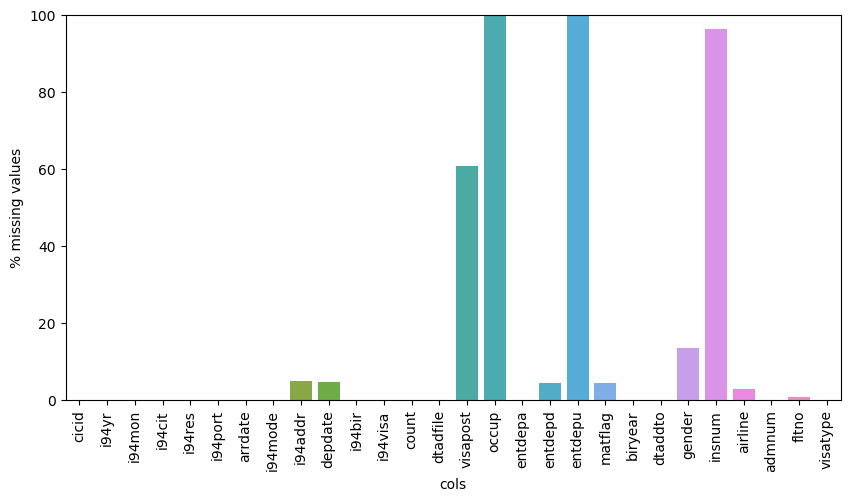

In [13]:
# lets visualize % missing values per immigration feature
visualise_missing_values(df)

In [14]:
# explore missing values per row and list rows with over 50% missing values
rows_missing_values = df.isnull().sum(axis=1)
# check if there are rows with over 50% of missing values
rows_missing_values[rows_missing_values > df.shape[0]/2]

Series([], dtype: int64)

In [ ]:
# drop duplicate rows 



##### Data Cleaning steps:
> Drop all columns with over 90% missing values. Columns with over 90% missing values are not deemed to contain sufficient data to be used for analytics.

> Drop all rows with 100% missing values. 

In [32]:
# dimension before cleaning
df.shape

(3096313, 28)

In [33]:
# clean immigration dataframe
new_df = clean_immigration(df)

In [34]:
# dimension after cleaning
new_df.shape

(3096313, 25)

#### EDA World Temperature Data

In [9]:
# summary statistics
df_wtd.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


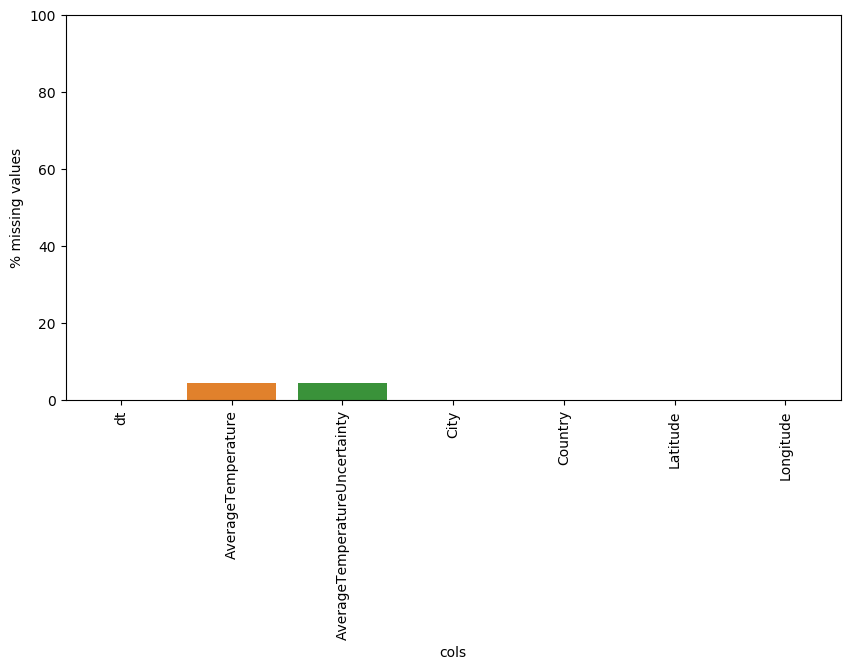

In [34]:
# visualise missing values by columns
visualise_missing_values(df_wtd)

###### Data Cleaning Steps

-  Drop all rows with missing average temperature
-  Drop duplicate columns 

In [13]:
new_temp_df = clean_temperature_data(df_wtd)

In [14]:
# dimensions before cleaning
df_wtd.shape

(8599212, 7)

In [16]:
# dimensions after cleaning
new_temp_df.shape

(8190783, 7)

#### EDA U.S. City Demographic Data 

In [18]:
# summary statistics
df_cdd.describe()

,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,Count
count,2891.000000,2.888000e+03,2.888000e+03,2.891000e+03,2878.000000,2.878000e+03,2875.000000,2.891000e+03
mean,35.494881,9.732843e+04,1.017696e+05,1.989668e+05,9367.832523,4.065360e+04,2.742543,4.896377e+04
std,4.401617,2.162999e+05,2.315646e+05,4.475559e+05,13211.219924,1.557491e+05,0.433291,1.443856e+05
min,22.900000,2.928100e+04,2.734800e+04,6.321500e+04,416.000000,8.610000e+02,2.000000,9.800000e+01
25%,32.800000,3.928900e+04,4.122700e+04,8.042900e+04,3739.000000,9.224000e+03,2.430000,3.435000e+03
50%,35.300000,5.234100e+04,5.380900e+04,1.067820e+05,5397.000000,1.882200e+04,2.650000,1.378000e+04
75%,38.000000,8.664175e+04,8.960400e+04,1.752320e+05,9368.000000,3.397175e+04,2.950000,5.444700e+04
max,70.500000,4.081698e+06,4.468707e+06,8.550405e+06,156961.000000,3.212500e+06,4.980000,3.835726e+06


In [19]:
# dimension
df_cdd.shape

(2891, 12)

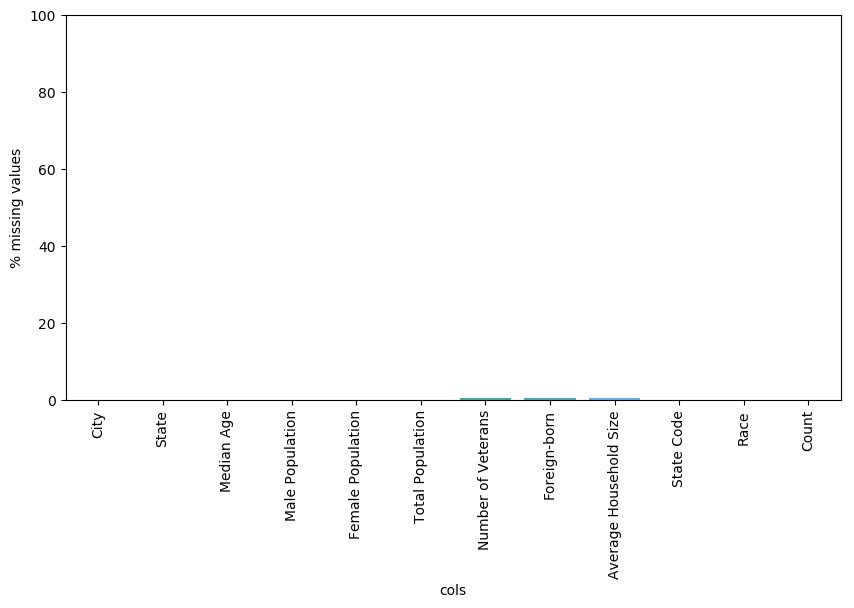

In [20]:
# explore missing values per feature
visualise_missing_values(df_cdd)

In [22]:
# View columns with missing data
nulls_df = pd.DataFrame(data= df_cdd.isnull().sum(), columns=['values'])
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['cols', 'values']

# calculate % missing values
nulls_df['% missing values'] = 100*nulls_df['values']/df.shape[0]
nulls_df[nulls_df['% missing values']>0]

,cols,values,% missing values
3,Male Population,3,0.000097
4,Female Population,3,0.000097
6,Number of Veterans,13,0.000420
7,Foreign-born,13,0.000420
8,Average Household Size,16,0.000517


###### Data Cleaning Steps

-  This dataset has very few missing values and it is thus safe to drop records with missing values
-  Drop duplicate columns 

In [30]:
# clean demographics data
new_demographics_df = clean_demographics_data(df_cdd)

In [31]:
# dimension after cleaning
new_demographics_df.shape

(2875, 12)

### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
Map out the conceptual data model and explain why you chose that model

#### 3.2 Mapping Out Data Pipelines
List the steps necessary to pipeline the data into the chosen data model

### Step 4: Run Pipelines to Model the Data 
#### 4.1 Create the data model
Build the data pipelines to create the data model.

In [ ]:
# Write code here

#### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the pipeline ran as expected. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
 * Unit tests for the scripts to ensure they are doing the right thing
 * Source/Count checks to ensure completeness
 
Run Quality Checks

In [ ]:
# Perform quality checks here

#### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies for the project.
* Propose how often the data should be updated and why.
* Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.
 * The data populates a dashboard that must be updated on a daily basis by 7am every day.
 * The database needed to be accessed by 100+ people.